In [1]:
import pickle
from datetime import datetime
import numpy
from tqdm import tqdm
from PIL import Image as PILImage

class Transaction:
    def __init__(self,time,color):
        self.time = time
        self.color = color
    
class Pixel:
    def __init__(self,x,y):
        self.transactions = []
        
    def addTransaction(self, mod):
        self.transactions.append(mod)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

rgb_db = {0: (255, 255, 255), 1: (228, 228, 228), 2: (136, 136, 136), 
          3: (34, 34, 34), 4: (255, 167, 209), 5: (229, 0, 0), 6: (229, 149, 0), 
          7: (160, 106, 66), 8: (229, 217, 0), 9: (148, 224, 68), 10: (2, 190, 1), 
          11: (0, 229, 240), 12: (0, 131, 199), 13: (0, 0, 234), 14: (224, 74, 255), 
          15: (130, 0, 128)}

dump_directory = "/home/srivbane/shared/caringbridge/data/projects/place-project/DataResults"
cluster_data = pickle.load(open("{}/ClusterResults/hour-0/cluster-0001.res".format(dump_directory), "rb"))
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

In [2]:
dataset = pickle.load(open("board.dat", "rb"))

In [3]:
def generate_emptycanvas(x_range,y_range):
    canvas = numpy.zeros((x_range, y_range, 3), dtype=numpy.uint8)
    for x in tqdm(range(x_range)):
        for y in range(y_range):
            canvas[x,y] = (255, 255, 255)   
    return (canvas)

def generate_image(time):
    canvas = generate_emptycanvas(1001,1001)

    for x in tqdm(range(len(dataset))):
        for y in range(len(dataset[x])):
            pixel = dataset[x][y]
            if len(pixel.transactions) > 0:
                for transaction in pixel.transactions:
                    if transaction.time <= time:
                        canvas[y,x] = rgb_db[transaction.color]
    return canvas

100%|██████████| 1001/1001 [00:05<00:00, 172.75it/s]


<IPython.core.display.Javascript object>


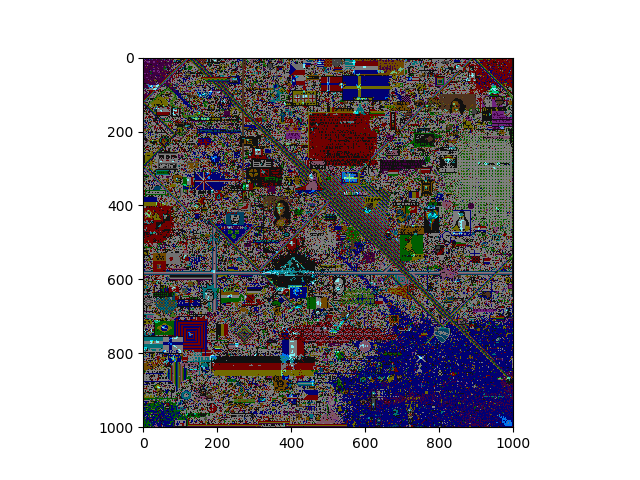

In [5]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['axes.facecolor'] = 'white'

data = np.zeros( (1001,1001,3), dtype=np.uint8)
color_map = generate_image(1491065400+(60*9))
for var in cluster_data:
    for x,y in var:
        data[y][x] = (0, 229, 240)
        
fig, axs = plt.subplots(1,1)
axs.imshow(data, interpolation='nearest')
axs.imshow(color_map, alpha=0.5)
plt.show()
plt.savefig('foo.png')

In [3]:
len(cluster_data)

265